# Visualización de Datos (Nivel Intermedio) — Matplotlib Puro

**Objetivo.** Este cuaderno ofrece ejemplos **didácticos** y **comentados** para 8 tipos de gráficos con énfasis en **pensamiento de utilidad**: qué pregunta responde cada gráfica y qué decisiones permite tomar.

**Reglas del curso:** 
- Usamos **solo Matplotlib**.
- **Un gráfico por figura**.
- **Sin especificar colores** manualmente.

**Instructor.** Dr. Isaías Martínez


In [2]:
# ================== CONFIGURACIÓN BASE ==================
# 1) Importaciones mínimas: numpy (cálculo), pandas (datos tabulares),
#    matplotlib.pyplot (gráficas).
# 2) Fijamos una semilla para reproducibilidad: la misma "aleatoriedad"
#    en cada ejecución facilita la discusión en clase.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)  # reproducibilidad: ¡mismo resultado en cada ejecución!

# Función de apoyo para anotar algunos puntos sin "ensuciar" la lectura.
# - 'step' controla cada cuántos puntos se etiqueta (p.ej., cada 20).
# - Útil para guiar al estudiante hacia la lectura de valores específicos.
def anotar_puntos(ax, x, y, step=1, fmt="({:.1f},{:.1f})"):
    for i, (xi, yi) in enumerate(zip(x, y)):
        if i % step == 0:
            ax.annotate(fmt.format(xi, yi), (xi, yi), textcoords="offset points", xytext=(5,5), fontsize=8)


## 2.1 Gráfico de dispersión (Scatter)

**Cuándo usarlo:** relaciones entre dos variables numéricas (patrones, tendencia, outliers).  
**Idea clave:** si hay patrón claro, quizá un modelo simple (lineal) sea razonable.  


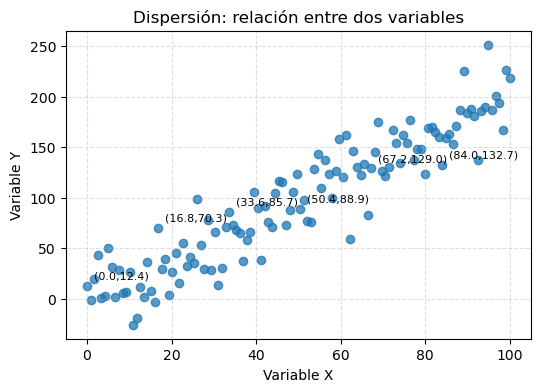

In [3]:
# ========== SCATTER: relación X–Y con ruido controlado ==========
# Paso 1) Generamos los datos: X uniformemente espaciado; Y con relación ~lineal y ruido.
n = 120
x = np.linspace(0, 100, n)
y = 2.0 * x + np.random.normal(0, 25, n)  # pendiente ~2 + ruido

# Paso 2) Creamos la figura (una sola por consigna) y el eje.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Paso 3) Dibujamos el scatter. No especificamos colores manualmente.
ax.scatter(x, y, alpha=0.75)

# Paso 4) Rotulamos y agregamos rejilla para lectura rápida.
ax.set_title('Dispersión: relación entre dos variables')
ax.set_xlabel('Variable X')
ax.set_ylabel('Variable Y')
ax.grid(True, linestyle='--', alpha=0.4)

# Paso 5) Anotamos algunos puntos para reforzar lectura numérica.
anotar_puntos(ax, x, y, step=20)

plt.show()

# ➤ Pregunta al estudiante:
#   ¿La nube sugiere relación lineal? ¿Dónde ves posibles outliers?
# ➤ Mini-experimento: aumenta la varianza del ruido y evalúa el impacto visual.


## 2.2 Trazado de líneas (Line Plot)

**Cuándo usarlo:** series de tiempo o secuencias ordenadas (tendencia, estacionalidad, rupturas).  


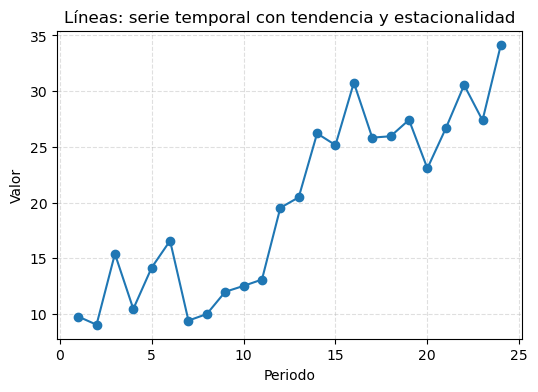

In [4]:
# ========== LÍNEAS: serie con tendencia + estacionalidad ==========
# Paso 1) Construimos una serie de 24 periodos (p.ej., meses).
t = np.arange(1, 25)
tendencia = 5 + 1.2 * t                       # componente de tendencia (creciente)
estacional = 4 * np.sin(2 * np.pi * t / 12)  # componente estacional anual (periodo=12)
ruido = np.random.normal(0, 2, size=t.shape) # componente aleatoria (ruido)
serie = tendencia + estacional + ruido

# Paso 2) Figura y eje.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Paso 3) Línea con marcadores para resaltar observaciones.
ax.plot(t, serie, marker='o')

# Paso 4) Metadatos del gráfico.
ax.set_title('Líneas: serie temporal con tendencia y estacionalidad')
ax.set_xlabel('Periodo')
ax.set_ylabel('Valor')
ax.grid(True, linestyle='--', alpha=0.4)

plt.show()

# ➤ Lectura guiada: ¿dónde notas la estacionalidad? ¿La tendencia es clara?
# ➤ Mini-experimento: cambia el periodo estacional (12→6) y observa el patrón.


## 2.3 Gráfico circular (Pie)

**Cuándo usarlo:** proporciones de un total con **pocas categorías** (mutuamente excluyentes).  
**Advertencia:** para comparaciones precisas suele ser mejor un gráfico de barras.


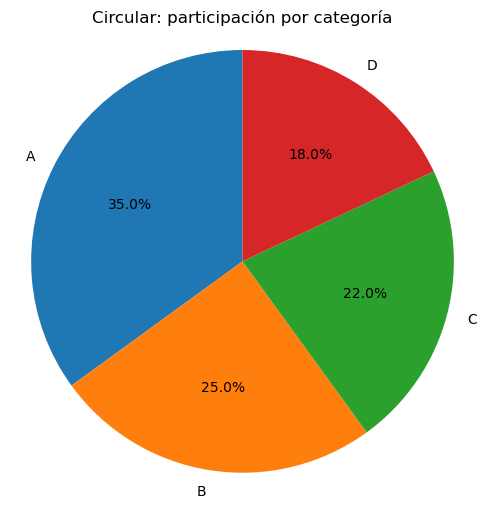

In [5]:
# ========== PIE: participación por categoría ==========
# Paso 1) Datos categóricos simples.
categorias = ['A', 'B', 'C', 'D']
valores = np.array([35, 25, 22, 18])

# Paso 2) Figura y eje.
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

# Paso 3) Pie chart. No definimos colores manualmente (se usan los de Matplotlib).
ax.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90)
ax.set_title('Circular: participación por categoría')
ax.axis('equal')  # círculo perfecto (no elipse)

plt.show()

# ➤ Discusión: ¿Qué tan fácil es comparar C vs. D aquí?
# ➤ Alternativa: prueba el mismo conjunto en barras y compara legibilidad.


## 2.4 Parcela de barras (Bar Plot)

**Cuándo usarlo:** comparar magnitudes entre categorías con mayor precisión perceptual.  


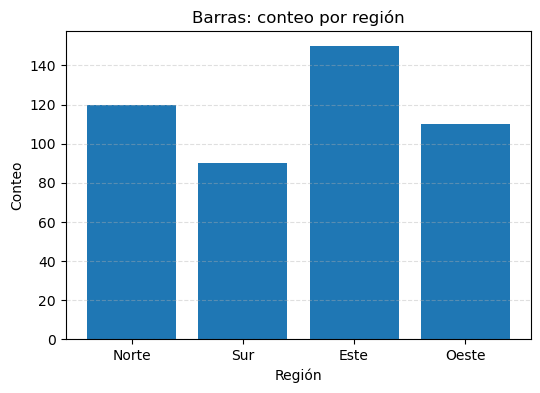

In [6]:
# ========== BARRAS: conteo por región ==========
# Paso 1) Datos de ejemplo (reordenables para enfatizar el mensaje).
cats = ['Norte', 'Sur', 'Este', 'Oeste']
conteos = np.array([120, 90, 150, 110])

# Paso 2) Figura y eje.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Paso 3) Barras simples.
ax.bar(cats, conteos)

# Paso 4) Etiquetas y rejilla horizontal (facilita comparar alturas).
ax.set_title('Barras: conteo por región')
ax.set_xlabel('Región')
ax.set_ylabel('Conteo')
ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.show()

# ➤ Ejercicio: ordena las barras de mayor a menor antes de graficar.
# ➤ Decisión: ¿qué región priorizarías si el conteo reflejara demanda?


## 2.5 Gráfico de histograma

**Cuándo usarlo:** revisar la **distribución** de una variable (asimetría, colas, modas).  


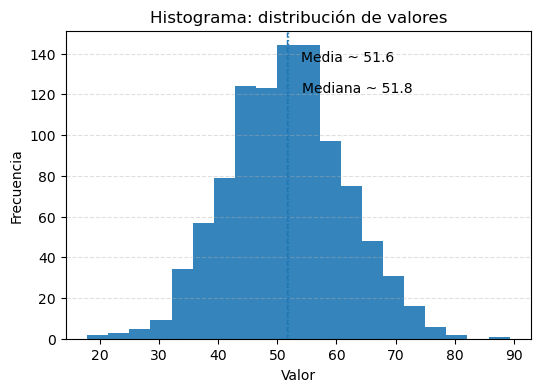

In [7]:
# ========== HISTOGRAMA: forma de la distribución ==========
# Paso 1) Generamos una muestra con ligera asimetría (normal + exponencial).
muestra = np.random.normal(loc=50, scale=10, size=1000) + np.random.exponential(scale=2, size=1000)*0.5

# Paso 2) Figura y eje.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Paso 3) Histograma con 20 bins (ajústalo para comparar).
ax.hist(muestra, bins=20, alpha=0.9)

# Paso 4) Líneas de media y mediana para interpretar sesgo.
media = np.mean(muestra)
mediana = np.median(muestra)
ax.axvline(media, linestyle='--', linewidth=1)
ax.axvline(mediana, linestyle=':', linewidth=1)
ax.annotate(f"Media ~ {media:.1f}", xy=(media, ax.get_ylim()[1]*0.9), xytext=(10,0), textcoords='offset points')
ax.annotate(f"Mediana ~ {mediana:.1f}", xy=(mediana, ax.get_ylim()[1]*0.8), xytext=(10,0), textcoords='offset points')

# Paso 5) Metadatos y rejilla.
ax.set_title('Histograma: distribución de valores')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.show()

# ➤ Observa: si media > mediana, puede haber sesgo a la derecha (cola positiva).
# ➤ Mini-experimento: cambia bins y detecta multimodalidad (si aparece).


## 2.6 Gráfico de burbujas (Bubble)

**Cuándo usarlo:** relación X–Y más una **tercera variable** codificada en el tamaño (s).  


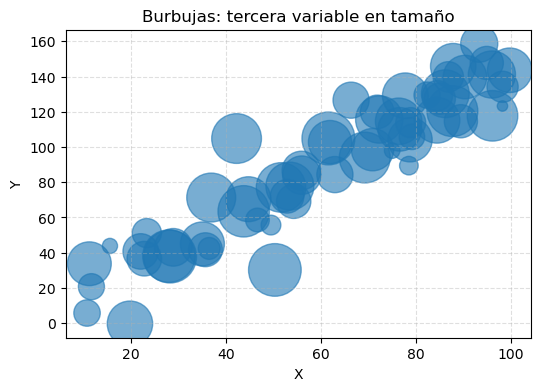

In [8]:
# ========== BURBUJAS: tercera variable en el tamaño ==========
# Paso 1) Tres variables: X, Y y S (tamaño).
n = 60
X = np.random.uniform(10, 100, size=n)
Y = 1.5 * X + np.random.normal(0, 15, size=n)
S = np.random.uniform(50, 1500, size=n)  # tamaños heterogéneos

# Paso 2) Figura y eje.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Paso 3) Scatter con tamaños 's'; no definimos color (solo alpha).
ax.scatter(X, Y, s=S, alpha=0.6)

# Paso 4) Metadatos y rejilla.
ax.set_title('Burbujas: tercera variable en tamaño')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, linestyle='--', alpha=0.4)

plt.show()

# ➤ Sugerencia: aplica S2 = np.sqrt(S) y compara legibilidad.
# ➤ Pregunta: ¿aporta el tamaño información útil o distrae del patrón X–Y?


## 2.7 Mapas de calor (Heatmaps)

**Cuándo usarlo:** visualizar matrices (p.ej., **correlaciones**), intensidades o tablas grandes.  


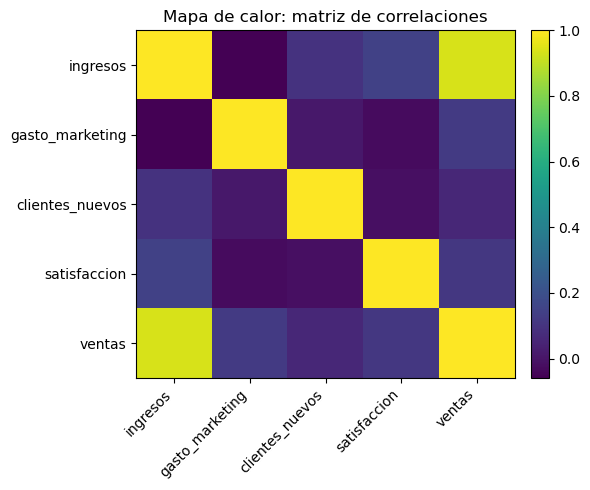

In [9]:
# ========== MAPA DE CALOR: matriz de correlaciones ==========
# Paso 1) Construimos un DataFrame con relaciones plausibles.
df = pd.DataFrame({
    'ingresos': np.random.normal(50, 10, 200),
    'gasto_marketing': np.random.normal(25, 5, 200),
    'clientes_nuevos': np.random.poisson(12, 200) + np.random.normal(0, 1, 200),
    'satisfaccion': np.clip(np.random.normal(3.5, 0.7, 200), 1, 5)
})
# Inducimos una variable dependiente combinada (ventas).
df['ventas'] = 2.5*df['ingresos'] + 1.1*df['gasto_marketing'] + np.random.normal(0, 8, 200)

# Paso 2) Correlaciones (solo numéricas).
corr = df.corr(numeric_only=True)

# Paso 3) Figura y eje.
fig = plt.figure(figsize=(6,5))
ax = plt.gca()

# Paso 4) Heatmap sin cmap explícito (paleta por defecto de Matplotlib).
im = ax.imshow(corr, aspect='auto')
ax.set_title('Mapa de calor: matriz de correlaciones')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

plt.show()

# ➤ Lectura: identifica pares con |r| alto y discute hipótesis (recuerda: correlación ≠ causalidad).


## 2.8 Análisis espectral (FFT — Transformada Rápida de Fourier)

**Cuándo usarlo:** identificar **frecuencias dominantes** en señales (vibraciones, audio, sensores).  


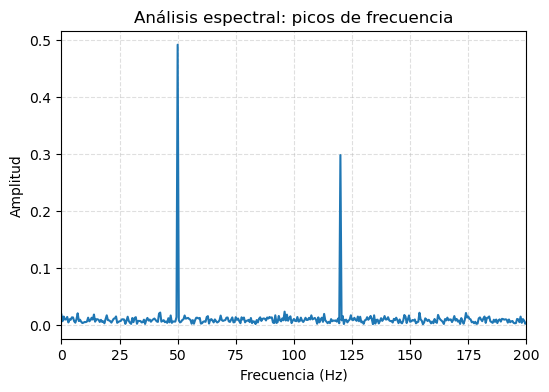

In [10]:
# ========== FFT: identificar picos de frecuencia ==========
# Paso 1) Diseñamos una señal sintética (suma de senoidales + ruido).
fs = 500   # frecuencia de muestreo (Hz)
T  = 2.0   # duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
f1, f2 = 50, 120
signal = 1.0*np.sin(2*np.pi*f1*t) + 0.6*np.sin(2*np.pi*f2*t) + 0.3*np.random.normal(0,1,len(t))

# Paso 2) FFT (solo frecuencias positivas con rfft).
Y = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(t), d=1/fs)
amplitud = np.abs(Y) / len(t)

# Paso 3) Espectro de amplitud.
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(freqs, amplitud)
ax.set_xlim(0, 200)  # enfocamos la ventana
ax.set_title('Análisis espectral: picos de frecuencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')
ax.grid(True, linestyle='--', alpha=0.4)

plt.show()

# ➤ Observa: picos cercanos a 50 y 120 Hz (componentes dominantes).
# ➤ Cuidado: respeta Nyquist (fs >= 2 * f_max) para evitar aliasing.


---

## Rúbrica rápida de utilidad (auto-evaluación)
1) **Propósito**: ¿Qué pregunta responde mejor este gráfico que otros?  
2) **Lectura**: ¿Qué patrón concreto ves (picos, tendencia, outliers, clúster)?  
3) **Decisión**: ¿Qué acción tomarías con base en la gráfica?  
4) **Iteración**: ¿Qué parámetro ajustarías para mejorar la claridad?  
5) **Limitaciones**: ¿Qué NO muestra y con qué otra gráfica complementarías?  
